# Workbook

In [4]:
# import necessary packages

import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from IPython import display
import tensorflow as tf
import pandas as pd
import librosa 

# Set the seed value for experiment reproducibility.
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [276]:
audio_path = 'dataset/AUDIO_NEW/'
audio_types = ['breathing', 'cough', 'speech']

In [289]:
def get_directories(audio_path, audio_type):
    from pathlib import Path
    
    POS = os.path.join(audio_path + audio_type, 'COVID_Positive')
    NEG = os.path.join(audio_path + audio_type, 'COVID_Negative')

    # Specify the directory path
    pos_directory = Path(POS)
    neg_directory = Path(NEG)
    
    # List all files in the directory using iterdir()
    # pos_files = [file.name for file in pos_directory.iterdir() if file.is_file()]
    # neg_files = [file.name for file in neg_directory.iterdir() if file.is_file()]

    return pos_directory, neg_directory

### breathing mel spectrogram

In [290]:
pos_directory_breathing, neg_directory_breathing = get_directories(audio_path, audio_type[0])

In [305]:
def create_mel_spectrogram(y, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=512, hop_length=128, n_mels=128)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Normalize the spectrogram
    if np.std(log_mel_spectrogram) == 0:
        print("log_mel_spectrogram == 0: ", file_path.resolve())
    # Normalize the spectrogram
    epsilon = 1e-6  # Small value to avoid division by zero
    log_mel_spectrogram = (log_mel_spectrogram - np.mean(log_mel_spectrogram)) / (np.std(log_mel_spectrogram) + epsilon)

    # Add channel dimension
    log_mel_spectrogram = np.expand_dims(log_mel_spectrogram, axis=-1)  
    
    return log_mel_spectrogram
def create_zero_crossing_rate(y):
    return np.mean(librosa.feature.zero_crossing_rate(y))
def create_spectral_centroid(y, sr):
    return np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

In [353]:
def create_features(pos_directory, neg_directory, target_length):
    spectrograms = []
    other_features = []
    labels = []

    for file_path in pos_directory.iterdir():
        y, sr = librosa.load(file_path, sr=16000)
        y = y[:target_length]

        zero_padding = np.zeros(target_length - len(y), dtype=np.float32)
        y = np.concatenate([y, zero_padding],axis=0)

        spectrograms.append(create_mel_spectrogram(y, sr))
        other_features.append([create_zero_crossing_rate(y), create_spectral_centroid(y, sr)])


        labels.append(1)
    for file_path in neg_directory.iterdir():
        y, sr = librosa.load(file_path, sr=16000)
        y = y[:target_length]

        zero_padding = np.zeros(target_length - len(y), dtype=np.float32)
        y = np.concatenate([y, zero_padding],axis=0)

        spectrograms.append(create_mel_spectrogram(y, sr))
        other_features.append([create_zero_crossing_rate(y), create_spectral_centroid(y, sr)])

        labels.append(0)

    print("Completed creating features for {0} and {1}! ".format(pos_directory, neg_directory))
    
    return spectrograms, other_features, labels

In [308]:
spectrograms, other_features, labels = create_features(pos_directory_breathing, neg_directory_breathing, 80000)

log_mel_spectrogram == 0:  /Users/opheliasin/covid-detection/dataset/AUDIO_NEW/breathing/COVID_Negative/DKWCDKOR.flac
log_mel_spectrogram == 0:  /Users/opheliasin/covid-detection/dataset/AUDIO_NEW/breathing/COVID_Negative/DKWCDKOR.flac
log_mel_spectrogram == 0:  /Users/opheliasin/covid-detection/dataset/AUDIO_NEW/breathing/COVID_Negative/DKWCDKOR.flac
Completed creating features for dataset/AUDIO_NEW/breathing/COVID_Positive and dataset/AUDIO_NEW/breathing/COVID_Negative! 


In [ ]:
# # List to store spectrograms and labels
# spectrograms = []
# zero_crossing_rates = []
# spectral_centroids = []
# labels = []

# for file_path in pos_directory.iterdir():
#     y, sr = librosa.load(file_path.resolve(), sr=16000)
#     y = y[:80000]

#     zero_padding = np.zeros(80000 - len(y), dtype=np.float32)
#     y = np.concatenate([y, zero_padding],axis=0)
    
#     mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=512, hop_length=128, n_mels=128)
#     log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

#     # Normalize the spectrogram
#     log_mel_spectrogram = (log_mel_spectrogram - np.mean(log_mel_spectrogram)) / np.std(log_mel_spectrogram)

#     log_mel_spectrogram = np.expand_dims(log_mel_spectrogram, axis=-1)  # Add channel dimension

#     # Append to list
#     spectrograms.append(log_mel_spectrogram)
    
#     zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
#     spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    
#     zero_crossing_rates.append(zero_crossing_rate)
#     spectral_centroids.append(spectral_centroid)
    
#     labels.append(1)  # Assuming binary classification

# for file_path in neg_directory.iterdir():
#     y, sr = librosa.load(file_path.resolve(), sr=16000)
#     y = y[:80000]

#     zero_padding = np.zeros(80000 - len(y), dtype=np.float32)
#     y = np.concatenate([y, zero_padding],axis=0)
    
#     mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=512, hop_length=128, n_mels=128)
#     log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

#     if np.std(log_mel_spectrogram) == 0:
#         print(file_path.resolve())
#     # Normalize the spectrogram
#     epsilon = 1e-6  # Small value to avoid division by zero
#     log_mel_spectrogram = (log_mel_spectrogram - np.mean(log_mel_spectrogram)) / (np.std(log_mel_spectrogram) + epsilon)
    
#     log_mel_spectrogram = np.expand_dims(log_mel_spectrogram, axis=-1)  # Add channel dimension
#     #print(log_mel_spectrogram.shape)
#     # Append to list
#     spectrograms.append(log_mel_spectrogram)

#     zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
#     spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    
#     zero_crossing_rates.append(zero_crossing_rate)
#     spectral_centroids.append(spectral_centroid)
    
#     labels.append(0)  

In [309]:
spectrograms = np.array(spectrograms)
other_features = np.array(other_features)
spectrograms_flattened = spectrograms.reshape(spectrograms.shape[0], -1)

In [349]:
spectrograms.shape

(965, 128, 626, 1)

In [369]:
spectrograms

array([[[[-0.65622175],
         [ 2.4486754 ],
         [ 3.7722514 ],
         ...,
         [-0.65622175],
         [-0.65622175],
         [-0.65622175]],

        [[-0.65622175],
         [ 2.442162  ],
         [ 3.8717341 ],
         ...,
         [-0.65622175],
         [-0.65622175],
         [-0.65622175]],

        [[-0.65622175],
         [ 2.4402568 ],
         [ 3.9560819 ],
         ...,
         [-0.65622175],
         [-0.65622175],
         [-0.65622175]],

        ...,

        [[-0.65622175],
         [-0.65622175],
         [ 0.134711  ],
         ...,
         [-0.65622175],
         [-0.65622175],
         [-0.65622175]],

        [[-0.65622175],
         [-0.65622175],
         [-0.25841004],
         ...,
         [-0.65622175],
         [-0.65622175],
         [-0.65622175]],

        [[-0.65622175],
         [-0.65622175],
         [-0.65622175],
         ...,
         [-0.65622175],
         [-0.65622175],
         [-0.65622175]]],


       [[[-0.83840394],


In [368]:
spectrograms_flattened

array([[-0.65622175,  2.4486754 ,  3.7722514 , ..., -0.65622175,
        -0.65622175, -0.65622175],
       [-0.83840394,  1.3296975 ,  3.8299115 , ..., -0.83840394,
        -0.83840394, -0.83840394],
       [ 0.54152554,  1.2326753 ,  1.8411088 , ..., -0.62757444,
        -0.62757444, -0.62757444],
       ...,
       [-0.9245542 , -0.9245542 , -0.9245542 , ..., -0.9245542 ,
        -0.9245542 , -0.9245542 ],
       [-1.9072235 , -1.9072235 , -1.7570328 , ..., -1.9072235 ,
        -1.9072235 , -1.9072235 ],
       [-0.95238936, -1.2747225 , -1.3838477 , ..., -1.3838477 ,
        -1.3838477 , -1.3838477 ]], dtype=float32)

In [311]:
X_combined = np.hstack([spectrograms_flattened, other_features])

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, labels, test_size=0.2, stratify=labels)

In [376]:
X_combined[0]

[-6.56221747e-01  2.44867539e+00  3.77225137e+00 ... -6.56221747e-01
  5.04092854e-01  2.52960552e+03]


In [256]:
# Flatten each spectrogram into a single vector
# Resulting shape will be (num_samples, height * width * channels)
# X_train_numpy = np.array(X_train)
# X_train_flattened = X_train_numpy.reshape(X_train_numpy.shape[0], -1)

# print(f"Original shape: {X_train_numpy.shape}")
# print(f"Flattened shape: {X_train_flattened.shape}")

Original shape: (772, 128, 626, 1)
Flattened shape: (772, 80128)


In [313]:
from imblearn.combine import SMOTEENN
from collections import Counter

smote_enn = SMOTEENN(random_state=seed)
X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)

# Print resampled class distribution
print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({np.int64(1): 621, np.int64(0): 181})


In [257]:
# from imblearn.combine import SMOTEENN
# from collections import Counter

# smote_enn = SMOTEENN(random_state=seed)
# X_resampled, y_resampled = smote_enn.fit_resample(X_train_flattened, y_train)

# # Print resampled class distribution
# print(f"Resampled class distribution: {Counter(y_resampled)}")

Resampled class distribution: Counter({1: 621, 0: 181})


In [ ]:
# # Reshape back to original format after resampling
# X_resampled = X_resampled.reshape(X_resampled.shape[0], 128, 626, 1)

# print(f"Reshaped back to original format: {X_resampled.shape}")

In [383]:
num_spectrogram_features = 128 * 626  # Flattened size

In [384]:
# Separate resampled spectrograms and other features for X_train_resampled
spectrograms_resampled = X_train_resampled[:, :num_spectrogram_features]
other_features_resampled = X_train_resampled[:, num_spectrogram_features:]

In [385]:
spectrograms_resampled

array([[-0.12766726, -0.12766726, -0.12766726, ..., -0.12766726,
        -0.12766726, -0.12766726],
       [-1.20031607, -0.83533609, -1.42708766, ..., -1.1171205 ,
        -1.08597791, -0.88582504],
       [-1.71493638, -0.8525514 ,  0.22773036, ..., -1.13038778,
        -1.30949533, -1.19815481],
       ...,
       [-0.60716918, -0.60716918, -0.60716918, ..., -0.60716918,
        -0.60716918, -0.60716918],
       [-0.97845894, -0.97845894, -0.97845894, ..., -0.97845894,
        -0.77971763, -0.64701863],
       [-1.30290475, -1.30290475, -1.30290475, ..., -0.93369361,
         0.08865191,  0.40673237]])

In [435]:
# Reshape the flattened spectrograms back to their original shape (128x626)
spectrograms_resampled_reshaped = spectrograms_resampled.reshape(spectrograms_resampled.shape[0], 128, 626, 1)

In [400]:
# Optionally add a channel dimension for CNN input (e.g., shape: [samples, 128, 626, 1])
#spectrograms_resampled_reshaped = np.expand_dims(spectrograms_resampled_reshaped, axis=-1)

In [436]:
spectrograms_resampled_reshaped.shape

(784, 128, 626, 1)

In [389]:
other_features_resampled.shape

(784, 2)

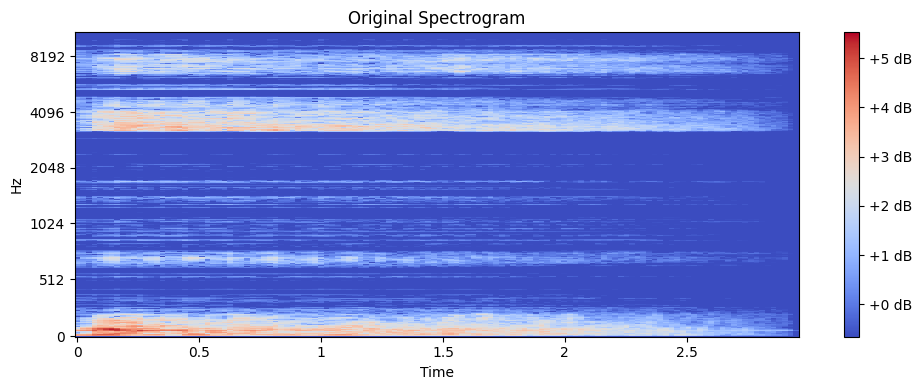

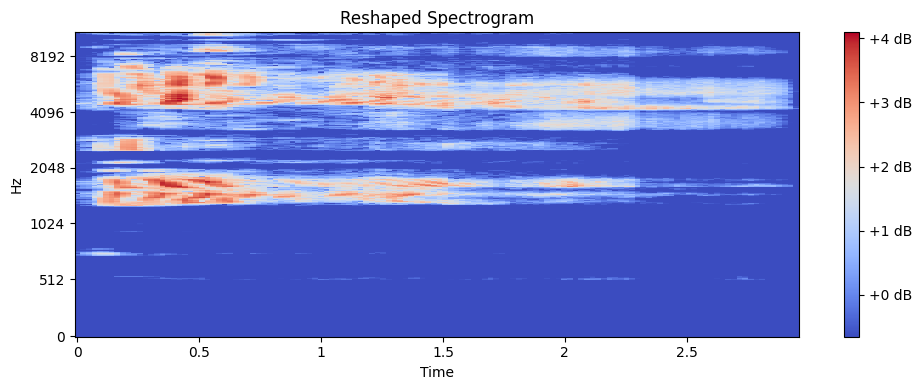

In [391]:
import matplotlib.pyplot as plt
import librosa.display

# Function to plot spectrogram
def plot_spectrogram(spectrogram, title):
    plt.figure(figsize=(10, 4))
    # Remove channel dimension if present for visualization
    if spectrogram.shape[-1] == 1:
        spectrogram = spectrogram.squeeze(-1)
    librosa.display.specshow(spectrogram.T, sr=22050, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Assuming 'original_spectrogram' is your original unflattened spectrogram
# and 'reshaped_spectrogram' is your reshaped version after processing

# Plot original spectrogram (before flattening)
plot_spectrogram(spectrograms[0], "Original Spectrogram")

# Plot reshaped spectrogram (after reshaping back)
plot_spectrogram(spectrograms_resampled_reshaped[100], "Reshaped Spectrogram")


In [402]:
# For X_test (no resampling needed), separate and reshape the spectrograms
spectrograms_test = X_test[:, :num_spectrogram_features]
other_features_test = X_test[:, num_spectrogram_features:]
spectrograms_test_reshaped = spectrograms_test.reshape(spectrograms_test.shape[0], 128, 626, 1)

In [403]:
y_train_resampled = np.array(y_train_resampled)
y_test = np.array(y_test)

In [404]:
# y_resampled = np.array(y_resampled)

### Single input model

In [405]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, GlobalAveragePooling2D

In [406]:
# model = Sequential()
# model.add(Input(shape=(625,128,1)))

# # First Conv2D layer followed by MaxPooling
# model.add(Conv2D(16, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2))) # Reduces spatial dimensions by half

# # Second Conv2D layer followed by MaxPooling
# model.add(Conv2D(16, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2))) # Further reduces spatial dimensions

# # Third Conv2D layer followed by MaxPooling
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2))) # Further reduces spatial dimensions

# # Fourth Conv2D layer followed by MaxPooling (new)
# model.add(Conv2D(64, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2))) # Further reduces spatial dimensions

# # Flatten and Dense layers
# #model.add(Flatten())
# model.add(GlobalAveragePooling2D())

# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [407]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [408]:
model.summary()

Model: "functional_93"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mel_spectrogram     │ (None, 626, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_43 (Conv2D)  │ (None, 624, 126,  │        160 │ mel_spectrogram[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_37    │ (None, 312, 63,   │          0 │ conv2d_43[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_44 (Conv2D)  │ (None, 310, 61,   │      2,320 │ max_pooling2d_37… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_38    │ (None, 155, 30,   │          0 │ conv2d_44[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_45 (Conv2D)  │ (None, 153, 28,   │      4,640 │ max_pooling2d_38… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_39    │ (None, 76, 14,    │          0 │ conv2d_45[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_46 (Conv2D)  │ (None, 74, 12,    │     18,496 │ max_pooling2d_39… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_40    │ (None, 37, 6, 64) │          0 │ conv2d_46[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ other_features      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ max_pooling2d_40… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │        192 │ other_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 128)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 128)       │     16,512 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 1)         │        129 │ dense_25[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,449 (165.82 KB)

 Trainable params: 42,449 (165.82 KB)

 Non-trainable params: 0 (0.00 B)

In [270]:
hist = model.fit(X_resampled, y_resampled, batch_size = 16, verbose = 2, epochs=20, validation_split = 0.1)

Epoch 1/20
46/46 - 6s - 134ms/step - loss: 0.7467 - precision_7: 0.7398 - recall_7: 0.6056 - val_loss: 0.2740 - val_precision_7: 1.0000 - val_recall_7: 1.0000
Epoch 2/20
46/46 - 6s - 138ms/step - loss: 0.5762 - precision_7: 0.7490 - recall_7: 1.0000 - val_loss: 0.2933 - val_precision_7: 1.0000 - val_recall_7: 1.0000
Epoch 3/20
46/46 - 6s - 129ms/step - loss: 0.5634 - precision_7: 0.7490 - recall_7: 1.0000 - val_loss: 0.2672 - val_precision_7: 1.0000 - val_recall_7: 1.0000
Epoch 4/20
46/46 - 7s - 156ms/step - loss: 0.5496 - precision_7: 0.7490 - recall_7: 1.0000 - val_loss: 0.2313 - val_precision_7: 1.0000 - val_recall_7: 1.0000
Epoch 5/20
46/46 - 8s - 185ms/step - loss: 0.5322 - precision_7: 0.7490 - recall_7: 1.0000 - val_loss: 0.2460 - val_precision_7: 1.0000 - val_recall_7: 1.0000
Epoch 6/20
46/46 - 6s - 141ms/step - loss: 0.5130 - precision_7: 0.7490 - recall_7: 1.0000 - val_loss: 0.2300 - val_precision_7: 1.0000 - val_recall_7: 1.0000
Epoch 7/20
46/46 - 6s - 136ms/step - loss: 0.4

### Fit Model, View Loss and KPI Plots

In [271]:
X_test = np.array(X_test)
y_test = np.array(y_test)

y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [272]:
y_pred_binary = (y_pred > 0.99).astype(int)

In [273]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_binary)

In [274]:
len(y_test)

193

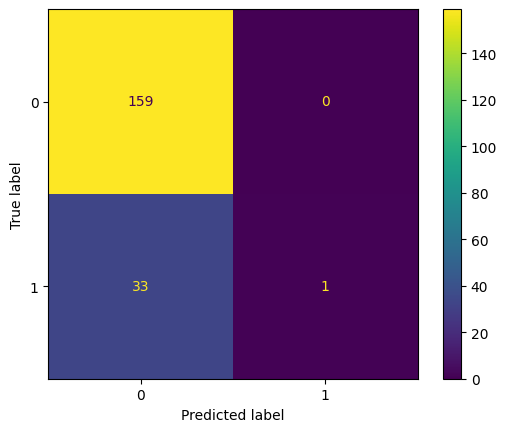

In [275]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()
plt.show()

### Multi-input model

In [474]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Concatenate, Dropout

# Define input for Mel spectrogram (shape: 625 time frames x 128 frequency bins x 1 channel)
mel_input = Input(shape=(128, 626, 1), name='mel_spectrogram')

# Define CNN sub-network for Mel spectrogram
x = Conv2D(16, (3,3), activation='relu')(mel_input)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = GlobalAveragePooling2D()(x)

# Define input for other features (e.g., zero-crossing rate and spectral centroid)
other_input = Input(shape=(2,), name='other_features')

# Define a simple dense sub-network for other features
y = Dense(64, activation='relu')(other_input)
y = Dense(128, activation='relu')(y)  # Add more dense layers
y = Dropout(0.3)(y)                   # Add dropout to prevent overfitting
y = Dense(128, activation='relu')(y)   # Another dense layer
y = Dense(64, activation='relu')(y)    # Another dense layer

# Concatenate both sub-networks
combined = Concatenate()([x, y])

# Add final classification layers
z = Dense(128, activation='relu')(combined)
z = Dense(1, activation='sigmoid')(z)  # Binary classification

In [475]:
X_train_spectrograms = spectrograms_resampled_reshaped
X_train_others = other_features_resampled
y_train = y_train_resampled

In [476]:
# Define the model with two inputs
model = tf.keras.Model(inputs=[mel_input, other_input], outputs=z)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','recall','precision'])

# Print model summary
model.summary()

Model: "functional_97"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mel_spectrogram     │ (None, 128, 626,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_63 (Conv2D)  │ (None, 126, 624,  │        160 │ mel_spectrogram[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_57    │ (None, 63, 312,   │          0 │ conv2d_63[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_64 (Conv2D)  │ (None, 61, 310,   │      2,320 │ max_pooling2d_57… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_58    │ (None, 30, 155,   │          0 │ conv2d_64[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ other_features      │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_65 (Conv2D)  │ (None, 28, 153,   │      4,640 │ max_pooling2d_58… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 64)        │        192 │ other_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_59    │ (None, 14, 76,    │          0 │ conv2d_65[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 128)       │      8,320 │ dense_38[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_66 (Conv2D)  │ (None, 12, 74,    │     18,496 │ max_pooling2d_59… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_39[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_60    │ (None, 6, 37, 64) │          0 │ conv2d_66[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 128)       │     16,512 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ max_pooling2d_60… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 64)        │      8,256 │ dense_40[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 128)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 128)       │     16,512 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 1)         │        129 │ dense_42[0][0]  

 Total params: 75,537 (295.07 KB)

 Trainable params: 75,537 (295.07 KB)

 Non-trainable params: 0 (0.00 B)

In [494]:
history = model.fit(
    [X_train_spectrograms,
     X_train_others],
    y_train,
    validation_split = 0.1,
    verbose = 2,
    epochs=20,
    batch_size=16
)

Epoch 1/20
45/45 - 9s - 198ms/step - accuracy: 0.8355 - loss: 0.4060 - precision: 0.8810 - recall: 0.9041 - val_accuracy: 0.8987 - val_loss: 0.2187 - val_precision: 1.0000 - val_recall: 0.8987
Epoch 2/20
45/45 - 10s - 232ms/step - accuracy: 0.8085 - loss: 0.4351 - precision: 0.8526 - recall: 0.9023 - val_accuracy: 0.7089 - val_loss: 0.6482 - val_precision: 1.0000 - val_recall: 0.7089
Epoch 3/20
45/45 - 9s - 191ms/step - accuracy: 0.8426 - loss: 0.3608 - precision: 0.8752 - recall: 0.9229 - val_accuracy: 0.8354 - val_loss: 0.3304 - val_precision: 1.0000 - val_recall: 0.8354
Epoch 4/20
45/45 - 8s - 181ms/step - accuracy: 0.8496 - loss: 0.3233 - precision: 0.8887 - recall: 0.9154 - val_accuracy: 0.9241 - val_loss: 0.1289 - val_precision: 1.0000 - val_recall: 0.9241
Epoch 5/20
45/45 - 9s - 194ms/step - accuracy: 0.8184 - loss: 0.4104 - precision: 0.8673 - recall: 0.8966 - val_accuracy: 0.7215 - val_loss: 0.6771 - val_precision: 1.0000 - val_recall: 0.7215
Epoch 6/20
45/45 - 9s - 211ms/step

In [441]:
X_train_spectrograms.shape

(784, 128, 626, 1)

In [442]:
X_train_others

array([[2.77262888e-02, 4.98051386e+02],
       [3.31384355e-01, 3.13788589e+03],
       [2.27800309e-01, 2.29950551e+03],
       ...,
       [4.01405671e-01, 2.36799968e+03],
       [3.83723847e-01, 3.18287039e+03],
       [4.18936148e-01, 3.81687347e+03]])

In [478]:
y_pred_train = model.predict([X_train_spectrograms, X_train_others])

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step


In [483]:
y_pred_train_binary = (y_pred_train > 0.99).astype(int)

In [484]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train_binary)

In [485]:
accuracy_train

0.26785714285714285

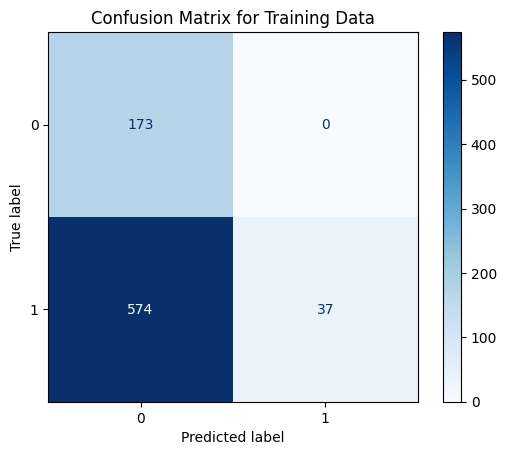

In [493]:
cm = confusion_matrix(y_train, y_pred_train_binary)

# Step 4: Visualize or print the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Training Data")
plt.show()

In [487]:
y_pred_test = model.predict([spectrograms_test_reshaped, other_features_test])

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step 


In [488]:
y_pred_test_binary = (y_pred > 0.99).astype(int)

In [489]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_binary)

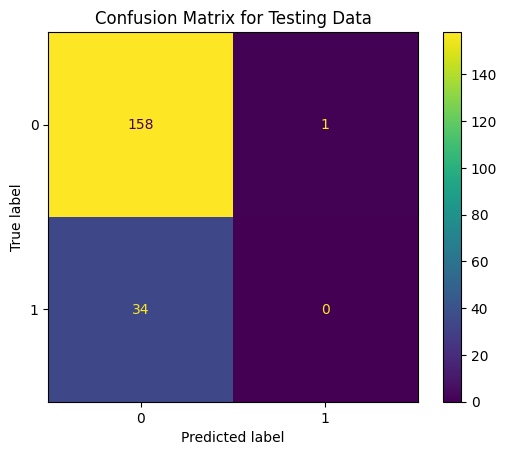

In [490]:
disp = ConfusionMatrixDisplay(cm)

disp.plot()
plt.title("Confusion Matrix for Testing Data")
plt.show()

In [491]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test, y_pred_test_binary)

In [492]:
accuracy_test

0.8186528497409327